In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [95]:
# Read the test data
df_train = pd.read_csv('train.csv')
df_train

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>],
       [<AxesSubplot:title={'center':'AveRooms'}>,
        <AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':'AveOccup'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'MedHouseVal'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

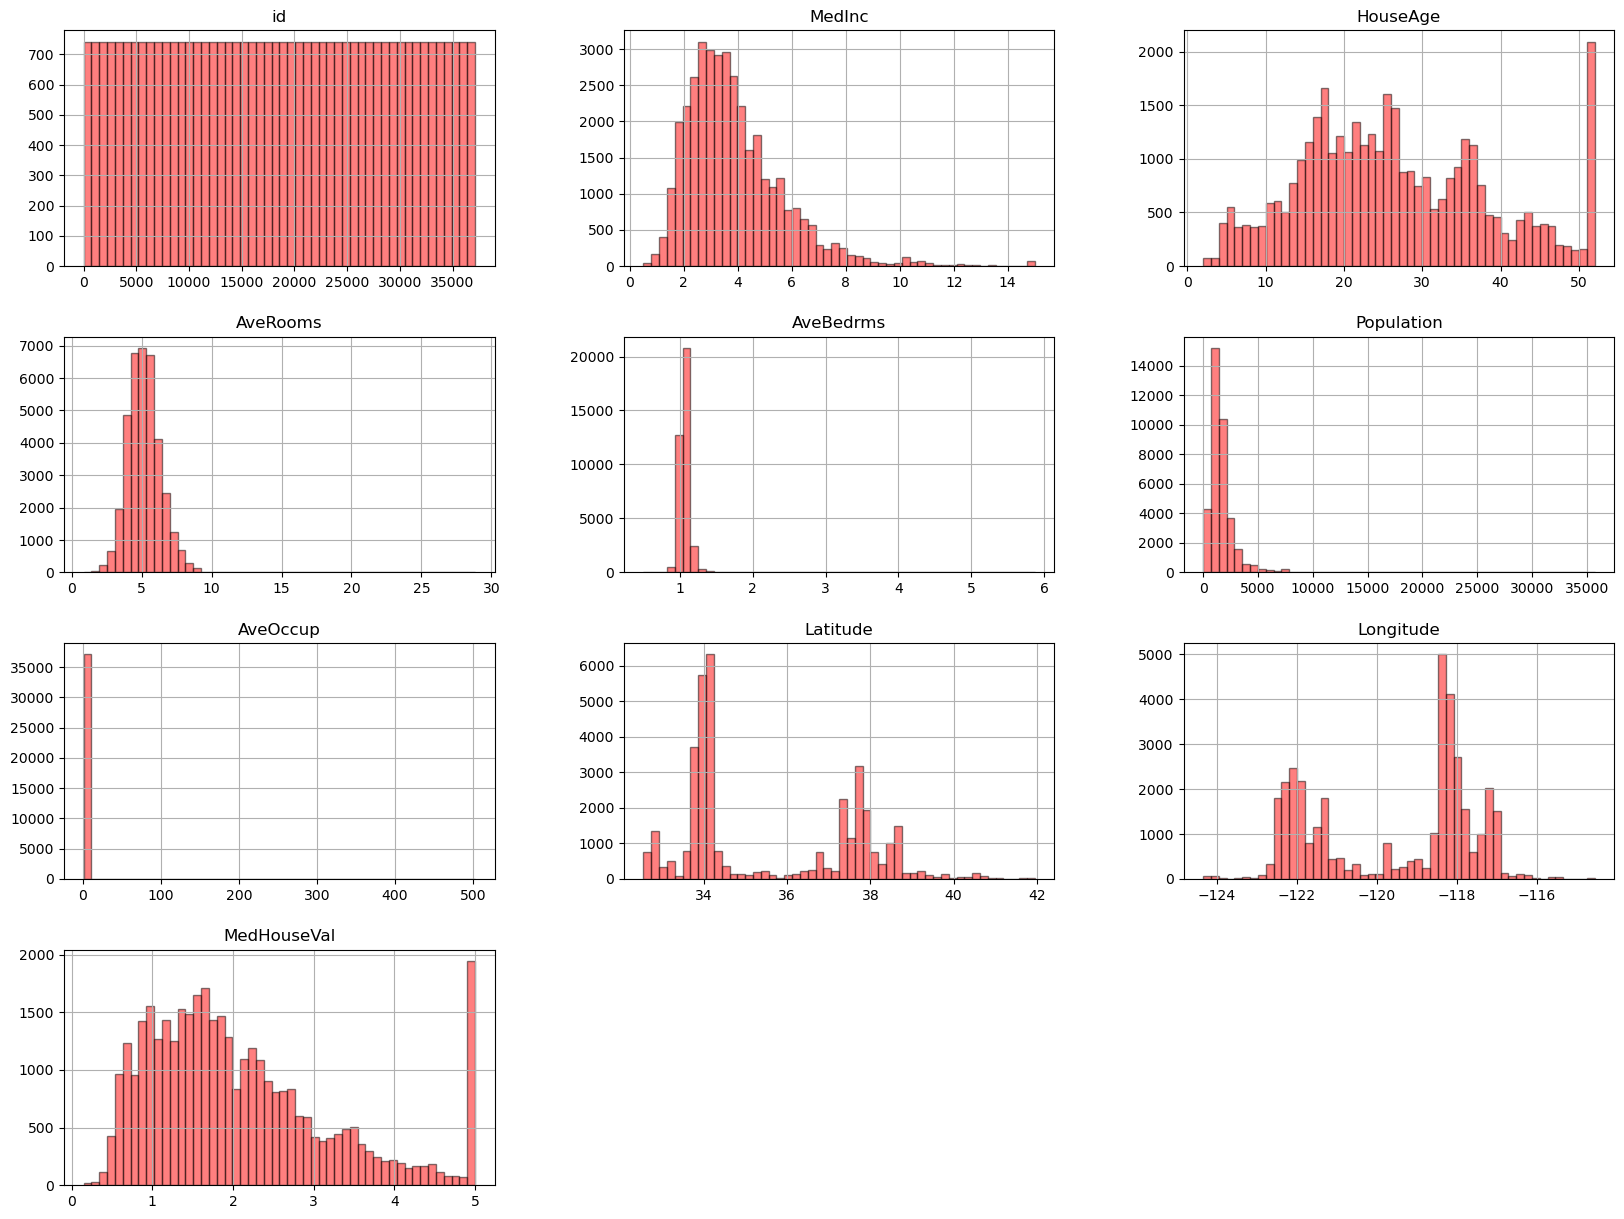

In [96]:
df_train.hist(bins=50, figsize=(20,15), color='r', alpha=0.5, edgecolor='k')

In [97]:
# split the data into train and test
# set X to MedInc	HouseAge, AveRooms	AveBedrms	Population	AveOccup	Latitude	Longitude columns
# set y to MedHouseVal
X = df_train.drop(columns= ["MedHouseVal", "id"], axis=1)
y = df_train["MedHouseVal"]

# split the data into train and test for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rfr_full_model = RandomForestRegressor()

# Fit the model to the training data
rfr_full_model.fit(X_train, y_train)

# Predict the test data
y_pred_rfr_full = rfr_full_model.predict(X_test)

#print mse
mse_rfr_full = mean_squared_error(y_test, y_pred_rfr_full)
print(f"Random Forest Regressor Full model MSE: {mse_rfr_full:.2f}")
print(f"Random Forest Regressor Full model RMSE: {np.sqrt(mse_rfr_full):.2f}")

# print r2
r2_rfr_full = r2_score(y_test, y_pred_rfr_full)
print(f"Random Forest Regressor Full model R2: {r2_rfr_full:.2f}")

Random Forest Regressor Full model MSE: 0.38
Random Forest Regressor Full model RMSE: 0.62
Random Forest Regressor Full model R2: 0.72


In [99]:
# implement the gradient boosting algorithm
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbr_full_model = GradientBoostingRegressor()

# Fit the model to the training data
gbr_full_model.fit(X_train, y_train)

# Predict the test data
y_pred_gbr_full = gbr_full_model .predict(X_test)

#print mse
mse_gbr_full = mean_squared_error(y_test, y_pred_gbr_full)
print(f"gradient boosting algorithm Full model MSE: {mse_gbr_full:.2f}")
print(f"gradient boosting algorithm Full model RMSE: {np.sqrt(mse_gbr_full):.2f}")

# print r2
r2_gbr_full = r2_score(y_test, y_pred_gbr_full)



gradient boosting algorithm Full model MSE: 0.39
gradient boosting algorithm Full model RMSE: 0.62


In [100]:
# Get the feature importances
importances = model.feature_importances_
# Print the feature importances
print(importances)

[0.67071462 0.02235115 0.01620135 0.00168583 0.00131365 0.09620543
 0.09022215 0.10130583]


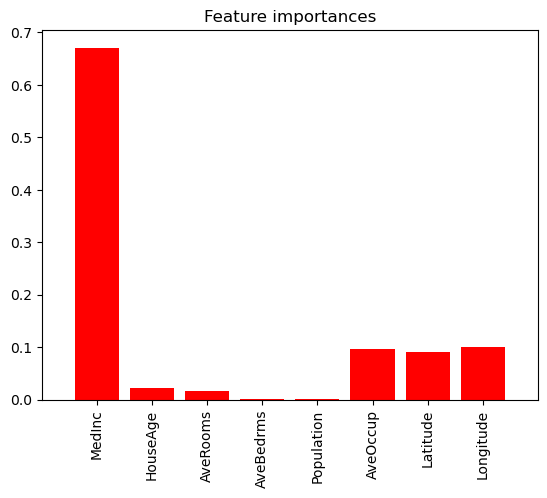

In [101]:
# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances, color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()



In [199]:
# Model using the top 4 features
# set X to MedInc, AveOccup, Latitude, Longitude columns
# set y to MedHouseVal
from scipy import stats
from scipy.stats import boxcox
import numpy as np


#replace the 0 values with 1 in df_train["MedInc"]
# df_train["MedInc"] = df_train["MedInc"].replace(0, 1)


# Apply the Box-Cox transformation to the data

# transformed_array = np.log(df_train["MedInc"] )

X_red = df_train[["MedInc", "AveOccup", "Latitude", "Longitude"]]

# Apply the log transformation to the data
y = np.log(df_train["MedHouseVal"])

# split the data into train and test for X and y
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y, test_size=0.2, random_state=42)


In [200]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rfr_red_model = RandomForestRegressor(max_depth= 15, min_samples_leaf=1, n_estimators=100)

# Fit the model to the training data
rfr_red_model.fit(X_red_train, y_red_train)

# Predict the test data
y_pred_rfr_red = rfr_red_model.predict(X_red_test)

#print mse
mse_rfr_red = mean_squared_error(y_red_test, y_pred_rfr_red)
print(f"Random Forest Regressor Reduced model MSE: {mse_rfr_red:.2f}")
print(f"Random Forest Regressor Reduced model RMSE: {np.sqrt(mse_rfr_red):.2f}")

# print r2
r2_rfr_red = r2_score(y_red_test, y_pred_rfr_red)
print(f"Random Forest Regressor Reduced model R2: {r2_rfr_red:.2f}")

Random Forest Regressor Reduced model MSE: 0.08
Random Forest Regressor Reduced model RMSE: 0.28
Random Forest Regressor Reduced model R2: 0.75


In [215]:
df_test = pd.read_csv("test.csv")


In [216]:
import math
X_test = df_test[["MedInc", "AveOccup", "Latitude", "Longitude"]]
y_pred = rfr_red_model.predict(X_test)
df_test["MedHouseVal"] = pow(math.e,y_pred)
df_test = df_test[["id", "MedHouseVal"]]
df_test.to_csv("output.csv", index = False)


In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

KeyboardInterrupt: 

In [152]:
#implement the ML algorithm with the lowest MSE on reduced features
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rfr_red_model = RandomForestRegressor(max_depth=15, min_samples_leaf=1)

# Fit the model to the training data
rfr_red_model.fit(X_red_train, y_red_train)

# Predict the test data
y_pred_rfr_red = rfr_red_model.predict(X_red_test)

#print mse
mse_rfr_red = mean_squared_error(y_red_test, y_pred_rfr_red)
print(f"Random Forest Regressor Reduced model MSE: {mse_rfr_red:.2f}")
print(f"Random Forest Regressor Reduced model RMSE: {np.sqrt(mse_rfr_red):.2f}")

# print r2
r2_rfr_red = r2_score(y_red_test, y_pred_rfr_red)




KeyboardInterrupt: 

In [144]:
# implement the gradient boosting algorithm with early stopping and reduced features and hyperparameter tuning lowest MSE
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbr_red_model = GradientBoostingRegressor(max_depth=5, min_samples_leaf=1)

# Fit the model to the training data
gbr_red_model.fit(X_red_train, y_red_train)

# Predict the test data
y_pred_gbr_red = gbr_red_model.predict(X_red_test)

#print mse
mse_gbr_red = mean_squared_error(y_red_test, y_pred_gbr_red)
print(f"gradient boosting algorithm Reduced model MSE: {mse_gbr_red:.2f}")
print(f"gradient boosting algorithm Reduced model RMSE: {np.sqrt(mse_gbr_red):.2f}")





gradient boosting algorithm Reduced model MSE: 0.37
gradient boosting algorithm Reduced model RMSE: 0.61


In [150]:
# implement gradient boosting with hyperparameter tuning using reduced features
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbr_red_model = GradientBoostingRegressor(max_depth=10, min_samples_leaf=1)

# Fit the model to the training data
gbr_red_model.fit(X_red_train, y_red_train)

# Predict the test data
y_pred_gbr_red = gbr_red_model.predict(X_red_test)

#print mse
mse_gbr_red = mean_squared_error(y_red_test, y_pred_gbr_red)
print(f"gradient boosting algorithm Reduced model MSE: {mse_gbr_red:.2f}")
print(f"gradient boosting algorithm Reduced model RMSE: {np.sqrt(mse_gbr_red):.2f}")

# print r2
r2_gbr_red = r2_score(y_red_test, y_pred_gbr_red)



gradient boosting algorithm Reduced model MSE: 0.38
gradient boosting algorithm Reduced model RMSE: 0.61
